# DS 5500 Homework 2 Solutions

### importing required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pylab import plt 
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.tools.eval_measures import rmse
from mpl_toolkits.mplot3d import axes3d, Axes3D

### function to read csv file and get the information in a format useful for further analysis and visualization

In [2]:
def read_csv(csv_file_path1, investigating_column_name1, new_investigating_column_name1,
            csv_file_path2, investigating_column_name2, new_investigating_column_name2):
    
    #reading first data file
    csv_data1 = pd.read_csv(csv_file_path1)
    #removing any row that has a missing value(information)
    csv_data1 = csv_data1.dropna(how = 'any', 
                               axis = 0)
    csv_data1 = csv_data1.rename(columns = {'geo' : 'country_abv', 
                                          'time' : 'year', 
                                          investigating_column_name1 : new_investigating_column_name1})
    
    #reading second data file
    csv_data2 = pd.read_csv(csv_file_path2)
    #removing any row that has a missing value(information)
    csv_data2 = csv_data2.dropna(how = 'any', 
                               axis = 0)
    csv_data2 = csv_data2.rename(columns = {'geo' : 'country_abv',
                                            'time' : 'year', 
                                            investigating_column_name2 : new_investigating_column_name2})
    
    #combining both the datasets 
    csv_data = pd.merge(csv_data1, csv_data2, 
                                how = 'outer', 
                                on = ['country_abv', 'year'], 
                                validate = 'one_to_one').dropna(how = 'any', 
                                                                axis = 0)
    return csv_data

## Problem 4

#### obtaining the dataframe containing income and life expectancy information for each country and each year

In [3]:
#obtaining the GDP per capita and life expectancy data over time
gdp_per_capita_data_file_path = '/Users/bishishta_mukherjee/Documents/GitHub/Information-Visualization/DS5500_HW2/data_files/ddf_datapoints_gdppercapita_us_inflation_adjusted_by_geo_time.csv'
life_expectancy_data_file_path = '/Users/bishishta_mukherjee/Documents/GitHub/Information-Visualization/DS5500_HW2/data_files/ddf_datapoints_life_expectancy_years_by_geo_time.csv'

gdp_le_data = read_csv(gdp_per_capita_data_file_path,
                'gdppercapita_us_inflation_adjusted', 
                'gdp_per_capita',
                life_expectancy_data_file_path,
                'life_expectancy_years',
                'life_expectancy')

In [4]:
gdp_le_data['log_gdp_per_capita'] = np.log(gdp_le_data['gdp_per_capita'])

In [5]:
gdp_le_data[:5]

,country_abv,year,gdp_per_capita,life_expectancy,log_gdp_per_capita
0,abw,2010,24271.94042,75.06,10.097076
1,afg,2002,364.57057,52.43,5.898720
2,afg,2003,376.75871,53.03,5.931605
3,afg,2004,364.09544,53.50,5.897416
4,afg,2005,389.41636,53.87,5.964649


#### splitting data into train and test set

In [6]:
gdp_le_data_train, gdp_le_data_test = train_test_split(gdp_le_data, test_size=0.2)

### baseline model (Y = life expectancy, X1 = income, X2 = Year)

#### checking for linearity between Y and X1, X2 using scatterplots

<Figure size 432x288 with 0 Axes>

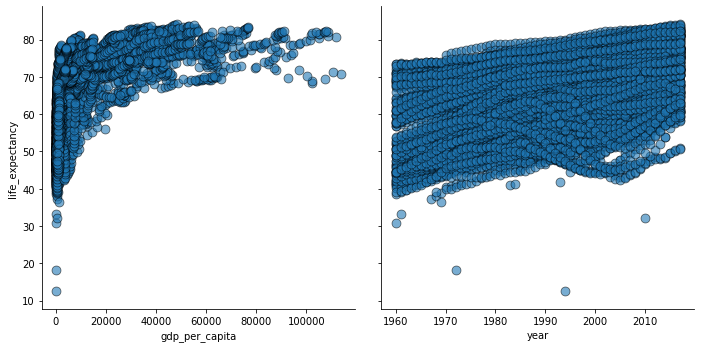

In [7]:
plt.figure()
sns.pairplot(gdp_le_data, x_vars=['gdp_per_capita','year'], 
             y_vars='life_expectancy', 
             height = 5, 
             plot_kws = {'alpha': 0.6, 
                         's': 80, 
                         'edgecolor': 'k'})
plt.savefig("solution_figures/q4_baseline_pair_plot.png")

#### fitting the regression model

In [8]:
q4_baseline_model = sm.ols(formula="life_expectancy ~ gdp_per_capita + year",
                           data = gdp_le_data_train).fit()

#### getting model stats

In [9]:
q4_baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     2794.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:09:05   Log-Likelihood:                -23865.
No. Observations:                6967   AIC:                         4.774e+04
Df Residuals:                    6964   BIC:                         4.776e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -364.9814     11.295    -32.313      0.000    -387.124    -342.839
gdp_per_capita     0.0003   5.72e-06     57.172      0.000       0.000       0.000
year               0.2147      0.006     37.841      0.000       0.204       0.226
==============================================================================
Omnibus:                      479.696   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              585.096
Skew:                          -0.709   Prob(JB):                    8.87e-128
Kurtosis:                       3.047   Cond. No.                     2.42e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### finding rmse for train and test set predictions made by model

In [10]:
q4_baseline_model_pred_train = q4_baseline_model.predict(gdp_le_data_train)
q4_baseline_model_pred = q4_baseline_model.predict(gdp_le_data_test)

print('train set rmse : ' +  str(rmse(gdp_le_data_train['life_expectancy'], 
                                      q4_baseline_model_pred_train, axis=0)))
print('test set rmse : ' +  str(rmse(gdp_le_data_test['life_expectancy'], 
                                     q4_baseline_model_pred, axis=0)))

train set rmse : 7.436969600803542
test set rmse : 7.5119717105239685


### final model (Y = life expectancy, X1 = log(income), X2 = Year)

#### checking for linearity between Y and X1, X2 using scatterplots

<Figure size 432x288 with 0 Axes>

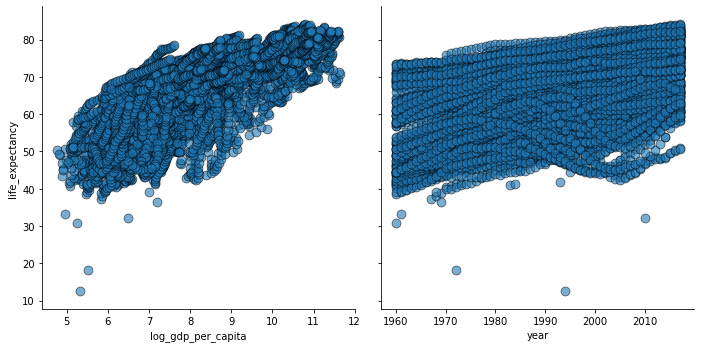

In [11]:
plt.figure()
sns.pairplot(gdp_le_data, x_vars=['log_gdp_per_capita', 'year'], 
             y_vars='life_expectancy', 
             height = 5, 
             plot_kws = {'alpha': 0.6, 
                         's': 80, 
                         'edgecolor': 'k'})
plt.savefig("solution_figures/q4_pair_plot.png")

#### fitting the regression model

In [12]:
q4_model = sm.ols(formula="life_expectancy ~ log_gdp_per_capita + year",
                           data = gdp_le_data_train).fit()

#### getting model stats

In [13]:
q4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     8437.
Date:                Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:09:06   Log-Likelihood:                -21631.
No. Observations:                6967   AIC:                         4.327e+04
Df Residuals:                    6964   BIC:                         4.329e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -351.2196      8.157    -43.059      0.000    -367.209    -335.230
log_gdp_per_capita     4.8016      0.043    111.664      0.000       4.717       4.886
year                   0.1897      0.004     46.038      0.000       0.182       0.198
==============================================================================
Omnibus:                      680.709   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1191.349
Skew:                          -0.683   Prob(JB):                    2.00e-259
Kurtosis:                       4.496   Cond. No.                     2.51e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### getting model params

In [14]:
q4_model.params

Intercept            -351.219607
log_gdp_per_capita      4.801580
year                    0.189715
dtype: float64

#### finding rmse for train and test set predictions made by model

In [15]:
q4_model_pred_train = q4_model.predict(gdp_le_data_train)
q4_model_pred = q4_model.predict(gdp_le_data_test)

print('train set rmse : ' +  str(rmse(gdp_le_data_train['life_expectancy'], 
                                      q4_model_pred_train, axis=0)))
print('test set rmse : ' +  str(rmse(gdp_le_data_test['life_expectancy'], 
                                     q4_model_pred, axis=0)))

train set rmse : 5.396616379711111
test set rmse : 5.581111963675163


#### actual vs fitted values plot

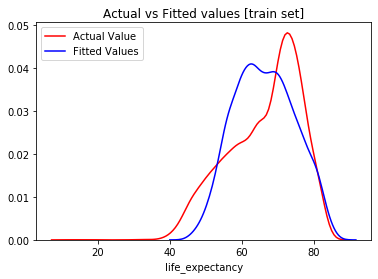

In [16]:
plt.figure()
ax1 = sns.distplot(gdp_le_data_train['life_expectancy'], 
                   hist=False, 
                   color="r", 
                   label="Actual Value")
sns.distplot(q4_model_pred_train, 
             hist=False, 
             color="b", 
             label="Fitted Values" , 
             ax=ax1)
ax1.set_title('Actual vs Fitted values [train set]')
ax1.set_xlabel('life_expectancy')
plt.savefig('solution_figures/q4_actualvsfitted_train.png')

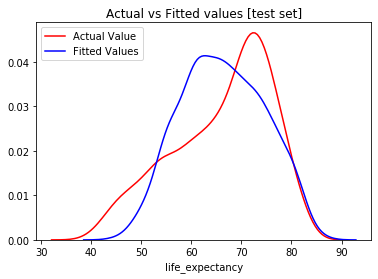

In [17]:
plt.figure()
ax1 = sns.distplot(gdp_le_data_test['life_expectancy'], 
                   hist=False, 
                   color="r", 
                   label="Actual Value")
sns.distplot(q4_model_pred, 
             hist=False, 
             color="b", 
             label="Fitted Values" , 
             ax=ax1)
ax1.set_title('Actual vs Fitted values [test set]')
ax1.set_xlabel('life_expectancy')
plt.savefig('solution_figures/q4_actualvsfitted_test.png')

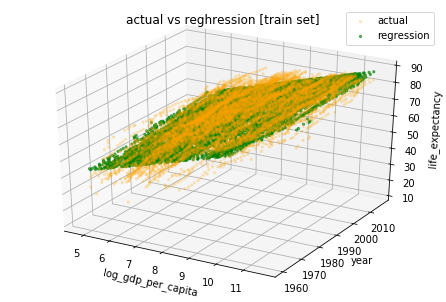

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
  
ax.scatter(gdp_le_data_train['log_gdp_per_capita'], 
           gdp_le_data_train['year'], 
           gdp_le_data_train['life_expectancy'], 
           label ='actual',
           s = 5, 
           color ="orange",
          alpha = 0.2) 
  
ax.scatter(gdp_le_data_train['log_gdp_per_capita'], 
           gdp_le_data_train['year'], 
           q4_model_pred_train,
           label ='regression', 
           s = 5, 
           color ="green",
          alpha = 0.6) 
  
ax.legend() 
ax.set_title('actual vs reghression [train set]')
ax.set_xlabel('log_gdp_per_capita')
ax.set_ylabel('year')
ax.set_zlabel('life_expectancy')
fig.savefig('solution_figures/q4_actualvsregression_train.png') 

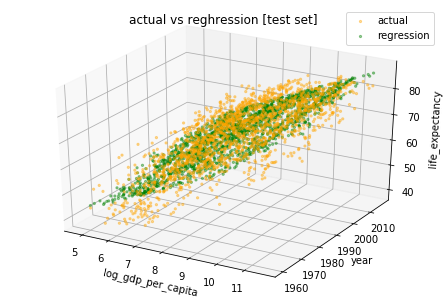

In [19]:
fig = plt.figure()
ax = Axes3D(fig)
  
ax.scatter(gdp_le_data_test['log_gdp_per_capita'], 
           gdp_le_data_test['year'], 
           gdp_le_data_test['life_expectancy'], 
           label ='actual',
           s = 5, 
           color ="orange",
          alpha = 0.4) 
  
ax.scatter(gdp_le_data_test['log_gdp_per_capita'], 
           gdp_le_data_test['year'], 
           q4_model_pred,
           label ='regression', 
           s = 5, 
           color ="green",
          alpha = 0.4) 
  
ax.legend()
ax.set_title('actual vs reghression [test set]')
ax.set_xlabel('log_gdp_per_capita')
ax.set_ylabel('year')
ax.set_zlabel('life_expectancy')
fig.savefig('solution_figures/q4_actualvsregression_test.png')

## Problem 5

#### obtaining the dataframe containing income and child mortality information for each country and each year

In [20]:
#obtaining the GDP per capita and life expectancy data over time
gdp_per_capita_data_file_path = '/Users/bishishta_mukherjee/Documents/GitHub/Information-Visualization/DS5500_HW2/data_files/ddf_datapoints_gdppercapita_us_inflation_adjusted_by_geo_time.csv'
child_mortality_data_file_path = '/Users/bishishta_mukherjee/Documents/GitHub/Information-Visualization/DS5500_HW2/data_files/ddf_datapoints_child_mortality_0_5_year_olds_dying_per_1000_born_by_geo_time.csv'

gdp_cm_data = read_csv(gdp_per_capita_data_file_path,
                       'gdppercapita_us_inflation_adjusted',
                       'gdp_per_capita',
                       child_mortality_data_file_path,
                       'child_mortality_0_5_year_olds_dying_per_1000_born',
                       'child_mortality_rate')

In [21]:
gdp_cm_data['log_gdp_per_capita'] = np.log(gdp_cm_data['gdp_per_capita'])
gdp_cm_data['log_child_mortality_rate'] = np.log(gdp_cm_data['child_mortality_rate'] )

In [22]:
gdp_cm_data[:5]

,country_abv,year,gdp_per_capita,child_mortality_rate,log_gdp_per_capita,log_child_mortality_rate
0,abw,2010,24271.94042,17.969,10.097076,2.888648
1,afg,2002,364.57057,122.200,5.898720,4.805659
2,afg,2003,376.75871,118.300,5.931605,4.773224
3,afg,2004,364.09544,114.400,5.897416,4.739701
4,afg,2005,389.41636,110.300,5.964649,4.703204


#### splitting the data into train and test set

In [23]:
gdp_cm_data_train, gdp_cm_data_test = train_test_split(gdp_cm_data, test_size=0.2)

### baseline model (Y = child mortality rate, X1 = income ( GDP per capita ), X2 = Year)

#### checking for linearity

<Figure size 432x288 with 0 Axes>

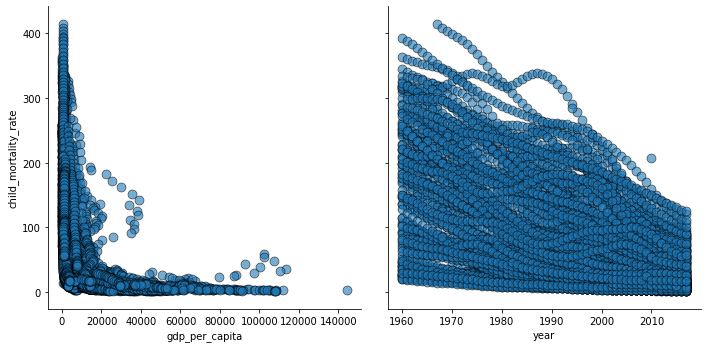

In [24]:
plt.figure()
sns.pairplot(gdp_cm_data, x_vars=['gdp_per_capita', 'year'], 
             y_vars='child_mortality_rate', 
             height = 5, 
             plot_kws = {'alpha': 0.6, 
                         's': 80, 
                         'edgecolor': 'k'})
plt.savefig("solution_figures/q5_baseline_pair_plot.png")

#### fitting the regression model

In [25]:
q5_baseline_model = sm.ols(formula="child_mortality_rate ~ gdp_per_capita + year",
                           data = gdp_cm_data_train).fit()

#### getting the model stats

In [26]:
q5_baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     child_mortality_rate   R-squared:                       0.377
Model:                              OLS   Adj. R-squared:                  0.377
Method:                   Least Squares   F-statistic:                     2103.
Date:                  Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                          16:09:09   Log-Likelihood:                -38437.
No. Observations:                  6952   AIC:                         7.688e+04
Df Residuals:                      6949   BIC:                         7.690e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4064.6324     92.862     43.771      0.000    3882.595    4246.670
gdp_per_capita    -0.0019   4.78e-05    -40.602      0.000      -0.002      -0.002
year              -1.9925      0.047    -42.715      0.000      -2.084      -1.901
==============================================================================
Omnibus:                      892.889   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1285.837
Skew:                           0.977   Prob(JB):                    6.08e-280
Kurtosis:                       3.787   Cond. No.                     2.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### #### finding rmse for train and train set predictions made by model

In [27]:
q5_baseline_model_pred_train = q5_baseline_model.predict(gdp_cm_data_train)
q5_baseline_model_pred = q5_baseline_model.predict(gdp_cm_data_test)

print('train set rmse : ' +  str(rmse(gdp_cm_data_train['child_mortality_rate'], 
                                      q5_baseline_model_pred_train, axis=0)))
print('test set rmse : ' +  str(rmse(gdp_cm_data_test['child_mortality_rate'], 
                                     q5_baseline_model_pred, axis=0)))

train set rmse : 60.94576919595701
test set rmse : 61.81589755871538


### final model (Y = log(child mortality rate), X1 = log(income ( GDP per capita )), X2 = Year)

#### checking for linearity

<Figure size 432x288 with 0 Axes>

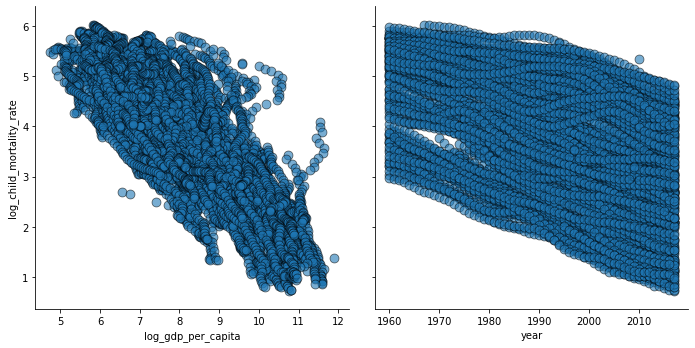

In [28]:
plt.figure()
sns.pairplot(gdp_cm_data, x_vars=['log_gdp_per_capita', 'year'], 
             y_vars='log_child_mortality_rate', 
             height = 5, 
             plot_kws = {'alpha': 0.6, 
                         's': 80, 
                         'edgecolor': 'k'})
plt.savefig("solution_figures/q5_pair_plot.png")

#### fitting the regression model

In [29]:
q5_model = sm.ols(formula="log_child_mortality_rate ~ log_gdp_per_capita + year",
                           data = gdp_cm_data_train).fit()

#### getting model stats

In [30]:
q5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     log_child_mortality_rate   R-squared:                       0.807
Model:                                  OLS   Adj. R-squared:                  0.807
Method:                       Least Squares   F-statistic:                 1.454e+04
Date:                      Mon, 28 Oct 2019   Prob (F-statistic):               0.00
Time:                              16:09:10   Log-Likelihood:                -5541.7
No. Observations:                      6952   AIC:                         1.109e+04
Df Residuals:                          6949   BIC:                         1.111e+04
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.9229      0.814     74.856      0.000      59.327      62.518
log_gdp_per_capita    -0.6256      0.004   -144.398      0.000      -0.634      -0.617
year                  -0.0261      0.000    -63.577      0.000      -0.027      -0.025
==============================================================================
Omnibus:                      413.721   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              663.623
Skew:                           0.487   Prob(JB):                    7.87e-145
Kurtosis:                       4.159   Cond. No.                     2.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### getting model parameters

In [31]:
q5_model.params

Intercept             60.922907
log_gdp_per_capita    -0.625595
year                  -0.026146
dtype: float64

#### finding rmse for train and train set predictions made by model

In [32]:
q5_model_pred_train = q5_model.predict(gdp_cm_data_train)
q5_model_pred = q5_model.predict(gdp_cm_data_test)

print('train set rmse : ' +  str(rmse(gdp_cm_data_train['log_child_mortality_rate'], 
                                      q5_model_pred_train, axis=0)))
print('test set rmse : ' +  str(rmse(gdp_cm_data_test['log_child_mortality_rate'], 
                                     q5_model_pred, axis=0)))

train set rmse : 0.5369742100028884
test set rmse : 0.5342174132209839


#### actual vs fitted values plot

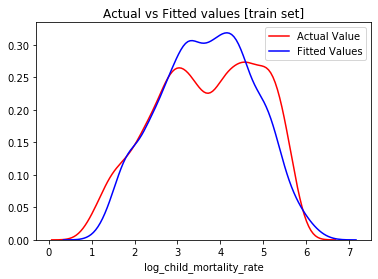

In [33]:
ax1 = sns.distplot(gdp_cm_data_train['log_child_mortality_rate'], 
                   hist=False, 
                   color="r", 
                   label="Actual Value")
sns.distplot(q5_model_pred_train, 
             hist=False, 
             color="b", 
             label="Fitted Values" , 
             ax=ax1)
ax1.set_title('Actual vs Fitted values [train set]')
ax1.set_xlabel('log_child_mortality_rate')
plt.savefig('solution_figures/q5_actualsvsfitted_train.png')

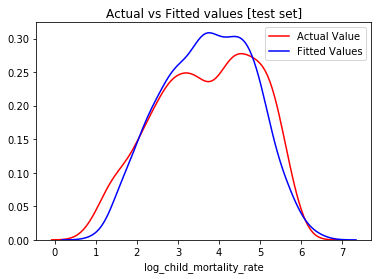

In [34]:
ax1 = sns.distplot(gdp_cm_data_test['log_child_mortality_rate'], 
                   hist=False, 
                   color="r", 
                   label="Actual Value")
sns.distplot(q5_model_pred, 
             hist=False, 
             color="b", 
             label="Fitted Values" , 
             ax=ax1)
ax1.set_title('Actual vs Fitted values [test set]')
ax1.set_xlabel('log_child_mortality_rate')
plt.savefig('solution_figures/q5_actualsvsfitted_test.png')

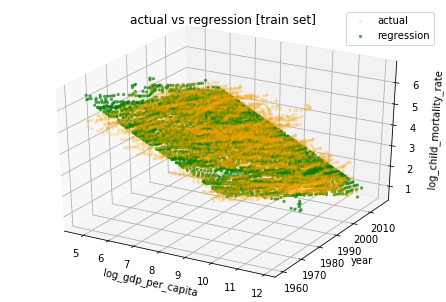

In [35]:
fig = plt.figure()
ax = Axes3D(fig)
  
ax.scatter(gdp_cm_data_train['log_gdp_per_capita'], 
           gdp_cm_data_train['year'], 
           gdp_cm_data_train['log_child_mortality_rate'], 
           label ='actual',
           s = 5, 
           color ="orange",
          alpha = 0.2) 
  
ax.scatter(gdp_cm_data_train['log_gdp_per_capita'], 
           gdp_cm_data_train['year'], 
           q5_model_pred_train,
           label ='regression', 
           s = 5, 
           color ="green",
          alpha = 0.6) 
  
ax.legend() 
ax.set_title('actual vs regression [train set]')
ax.set_xlabel('log_gdp_per_capita')
ax.set_ylabel('year')
ax.set_zlabel('log_child_mortality_rate')
plt.savefig('solution_figures/q5_actualsvsregression_train.png')

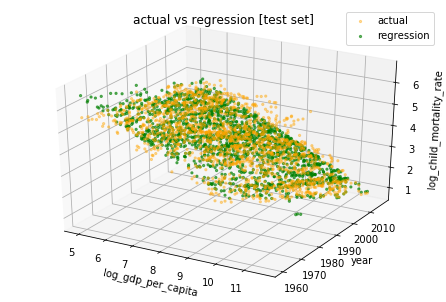

In [36]:
fig = plt.figure()
ax = Axes3D(fig)
  
ax.scatter(gdp_cm_data_test['log_gdp_per_capita'], 
           gdp_cm_data_test['year'], 
           gdp_cm_data_test['log_child_mortality_rate'], 
           label ='actual',
           s = 5, 
           color ="orange",
          alpha = 0.4) 
  
ax.scatter(gdp_cm_data_test['log_gdp_per_capita'], 
           gdp_cm_data_test['year'], 
           q5_model_pred,
           label ='regression', 
           s = 5, 
           color ="green",
          alpha = 0.6) 
  
ax.legend()
ax.set_title('actual vs regression [test set]')
ax.set_xlabel('log_gdp_per_capita')
ax.set_ylabel('year')
ax.set_zlabel('log_child_mortality_rate')
plt.savefig('solution_figures/q5_actualsvsregression_test.png') 